## Datasets & DataLoader

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

### Loading a dataset

In [2]:
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [3]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [4]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
train_data.targets.shape

torch.Size([60000])

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

### Visualizeing

In [9]:
labels_map = {
 i:train_data.classes[i] for i in range(len(train_data.classes))
}
labels_map

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

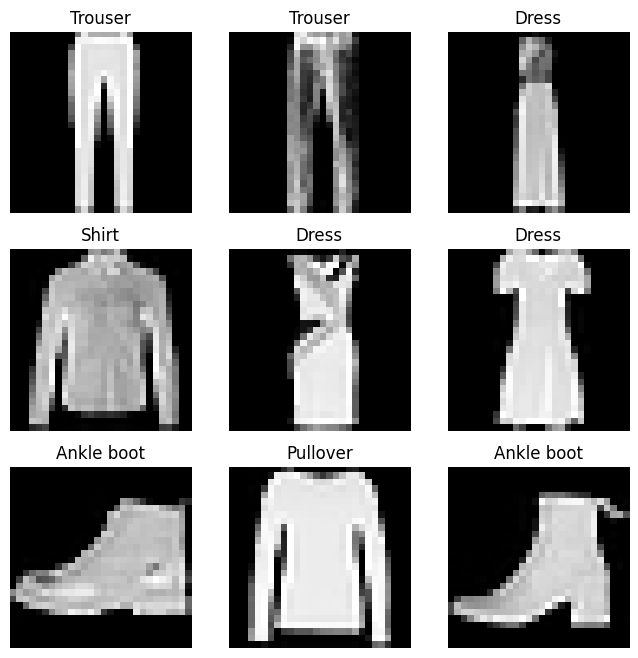

In [10]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Iterate through the DataLoader

In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1024, shuffle=True)

In [12]:
features, labels = next(iter(train_dataloader))

In [13]:
features.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

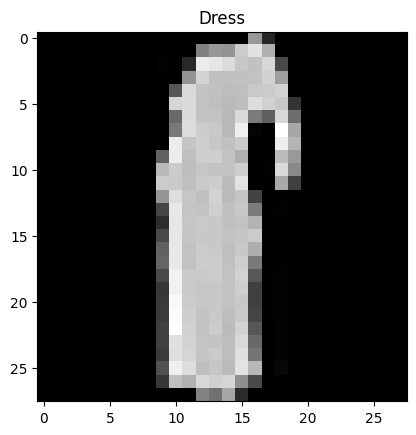

In [14]:
img = features[0].squeeze()
label = labels[0].item()
plt.imshow(img, cmap='gray')
plt.title(labels_map[label])
plt.show()

In [18]:
for batch in test_dataloader:
    X, y = batch
    print(X.shape, y.shape)

torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([1024, 1, 28, 28]) torch.Size([1024])
torch.Size([784, 1, 28, 28]) torch.Size([784])
